# Filtro Sobel: implementação e discussões

## Introdução

O filtro de Sobel também pode ser classificado como um filtro passa-alta, mediante sua características de atenuar intereferências abaixo da frequência de corte do filtro, porém tal valor é diferente do Filtro de Laplace. É um operador linear, cujo seu desenvolvimento está pautado em conceitos de diferenciação no domínio do tempo discreto.

Enquanto a aplicação do filtros de média podem ser entendidos como uma integração, o operador de sobel representa uma derivação de primeira ordem no espaço, representada pelo gradiente(taxa de variação) nas direções do sinal bidimensional. O definição desta derivada é dada por:

$$\frac{\partial f}{\partial x} = f(x+1) -  f(x)$$


E o vetor gradiente representado por:


$$ grad(f) = \left(\begin{array}{ccc} gx \\ gy  \end{array}\right) = \left(\begin{array}{ccc} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}  \end{array}\right) $$

Utilizando operadores de vizinhança diagonais o valor dos gradientes dado um ponto central no sinal é:

$$\frac{\partial f}{\partial x} = [f(x-1,y+1) + 2f(x,y+1) + f(x+1,y+1)] -  [f(x-1,y-1) + 2f(x,y-1) + f(x+1,y-1)] $$

$$\frac{\partial f}{\partial y} = [f(x+1,y-1) + 2f(x+1,y) + f(x+1,y+1)] -  [f(x-1,y-1) + 2f(x-1,y) + f(x-1,y+1)] $$

O efeito do vetor gradiente pode ser traduzido pela a aplicação de duas máscaras, nas direções $x$ e $y$ da imagem da seguinte forma:

Máscara horizontal:

$$\ \begin{array}{ccc}
......... x-1 & x & x+1.... \end{array} \ $$

$$\ \begin{array}{ccc}
y-1 ...\\
y   ...\\
y+1 ...\end{array} 
\left( \begin{array}{ccc}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \end{array} \right)\ $$

Máscara vertical:

$$\ \begin{array}{ccc}
......... x-1 & x & x+1.... \end{array} \ $$

$$\ \begin{array}{ccc}
y-1 ...\\
y   ...\\
y+1 ...\end{array} 
\left( \begin{array}{ccc}
-1 & -2& -1 \\
 0 & 0 & 0 \\
1  & 2 & 1 \end{array} \right)\ $$

É importante ressaltar que o somatório dos valores da máscara devem ser sempre zero, por ser um operador derivativo.

A magnitude imposta pelo vetor gradiente é transmitida ao pixel pela seguinte equação:

$$ M(x,y) = \sqrt{gx^2 + gy^2} $$ 

A equação para cálculo dos gradientes considera um peso maior aos pontos centrais, diferente do kernel do Filtro de Prewit, que atribui um peso identico as valores adjacentes e diagonais da imagem.

## Implementação (Código fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir tamanho do kernel utilizado
- Definir número de aplicações do filtro

In [3]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

#################### Filtro da média
# Kernel def:

Filter.kernelSize = 3

# Número de aplicações do filtro
numAp = 1;

# Variável auxiliar para guardar a saída
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.filterSobel(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.filterSobel(Filter)
        print(U[k,:,:])



################################
Process finished
Filter have been applied
################################
[[  36.   34.   34. ...,   20.   20.   21.]
 [  34.    2.    2. ...,    2.    4.   17.]
 [  34.    1.    2. ...,    2.    2.   19.]
 ..., 
 [ 103.    2.    1. ...,    2.    5.   47.]
 [ 102.    3.    2. ...,    3.    4.   47.]
 [ 107.  101.  102. ...,   45.   47.   48.]]


### Exibir resultados:

- Imagem original:

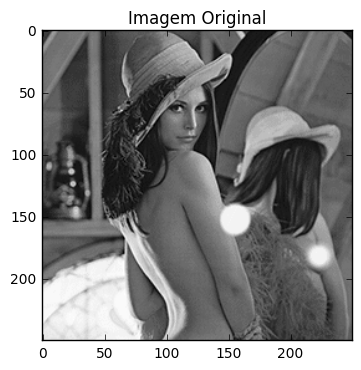

In [5]:
######### Using matplotlib #################
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

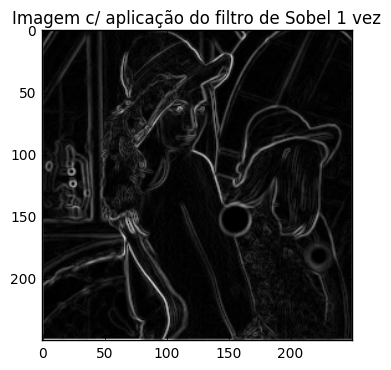

In [6]:
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Imagem c/ aplicação do filtro de Sobel %d vez' %numAp)
plt.show()

#### Apêndice 01 - Função para cálculo do filtro de Sobel:

In [7]:
def filterSobel (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Sobel filter
    ## Pre-set steps:
    ### Generate two kernersl (horizontal and vertical)
    Filter.kernel = nf.structtype()
    Filter.kernel.horz = np.zeros((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel.horz[:, 0] = -1
    Filter.kernel.horz[int(Filter.kernelSize/2), 0] = -2
    Filter.kernel.horz[:, (Filter.kernelSize - 1)] = 1
    Filter.kernel.horz[int(Filter.kernelSize/2), (Filter.kernelSize - 1)] = 2

    Filter.kernel.vert = np.zeros((Filter.kernelSize, Filter.kernelSize))
    Filter.kernel.vert[0, :] = -1
    Filter.kernel.vert[0, int(Filter.kernelSize/2)] = -2
    Filter.kernel.vert[(Filter.kernelSize - 1), :] = 1
    Filter.kernel.vert[(Filter.kernelSize - 1), int(Filter.kernelSize/2)] = 2

    #################
    central = m.floor((Filter.kernelSize / 2))

    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A

    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    somaHorz = 0;
    somaVert = 0;
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):

                    somaHorz = (C[j + kl, k + kk] * Filter.kernel.horz[kl, kk]) + somaHorz
                    somaVert = (C[j + kl, k + kk] * Filter.kernel.vert[kl, kk]) + somaVert

            Ph = m.ceil((somaHorz / (Filter.kernelSize ** 2)))
            Pv = m.ceil((somaVert / (Filter.kernelSize ** 2)))
            somaHorz = 0
            somaVert = 0
            D[j, k] = np.sqrt(Ph**2 + Pv**2)

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Filter have been applied')
    print('################################')

    return D


## Discussões sobre o método

Tanto o filtro de Sobel quanto o de Prewit representam efeitos derivativos na função de intesidade luminosa da imagem. Porém o filtro de Sobel promove melhores suavizações na imagem, justificado pela peso maior que se leva aos pixels adjacentes no cálculo do vetor gradiente daquele pixel.

Ambos são bons para realce bordas das imagens, com características de operação são bastantes similares. Contudo, prefere-se o filtro de Sobel por conta da leve suavização promovida nas regiões mais próximas do pixel em questão, esse efeito também tende a aprensentar repostas menos ruidosas ainda que o filtro de Prewit.

## Operações do filtro de laplace em uma imagem

- Definição da mascara:

Imagem original:


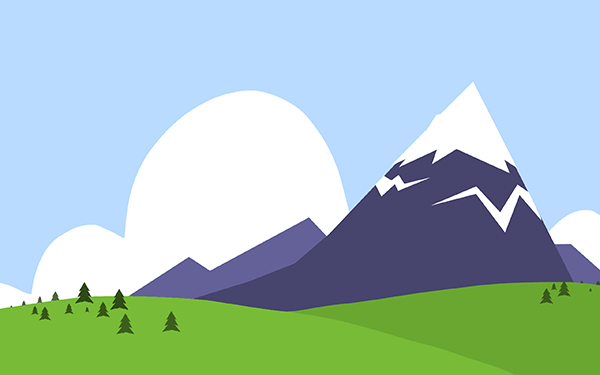

In [8]:
print("Imagem original:")
Image(filename='mountain-small.png')

################################
Process finished
Filter have been applied
################################
################################
Process finished
Filter have been applied
################################
################################
Process finished
Filter have been applied
################################


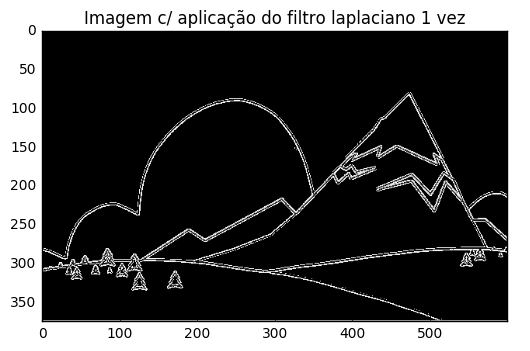

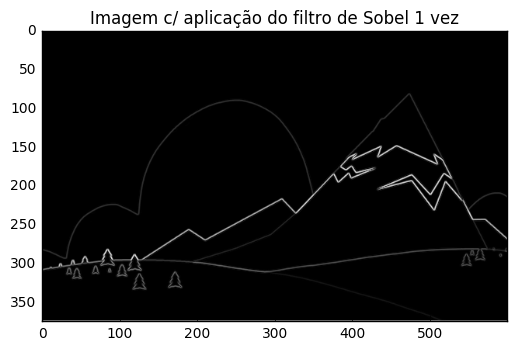

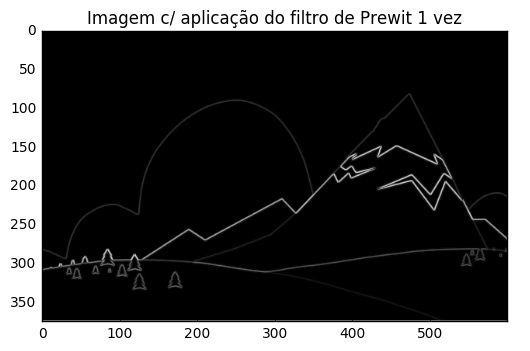

In [9]:
Filter.img = cv2.imread('mountain-small.png',cv2.IMREAD_GRAYSCALE)
U2 = nf.filterLaplace(Filter)

plt.figure(2)
plt.imshow(U2, 'gray')
plt.title('Imagem c/ aplicação do filtro laplaciano 1 vez')

U3 = nf.filterSobel(Filter)

plt.figure(3)
plt.imshow(U3, 'gray')
plt.title('Imagem c/ aplicação do filtro de Sobel 1 vez')

U5 = nf.filterPrewit(Filter)

plt.figure(3+1)
plt.imshow(U5, 'gray')
plt.title('Imagem c/ aplicação do filtro de Prewit 1 vez')

plt.show()

O resultado está de acordo com as definições posteriores do filtro: regições de transição que apresentavam valores de intensidade bastante diferentes nos pixels próximos(derivada elevada) foram realçadas, ou contrário de regiões que tinham valores de intensidade próximos foram desprezadas(derivada nula).

## Quanto ao tamanho do kernel:

Submentendo uma imagem a uma variação do tamanho kernel constatou-se que máscaras de tamanhos menores, como 3x3, demonstram-se mais eficazes quando o objetivo é realce de bordas, pois a operação de gradiente do filtro de Sobel é valorizada em regiões próximas ao pixel, enquanto que em máscaras maiores, com 17x17, os valores de gradientes destoam devido a distância entre os pixels, propciando um valor de variação não confiável para a região.

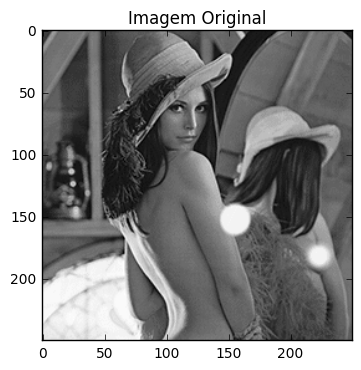

In [10]:
plt.figure(1)
plt.imshow(img, 'gray')
plt.title('Imagem Original')
plt.show()

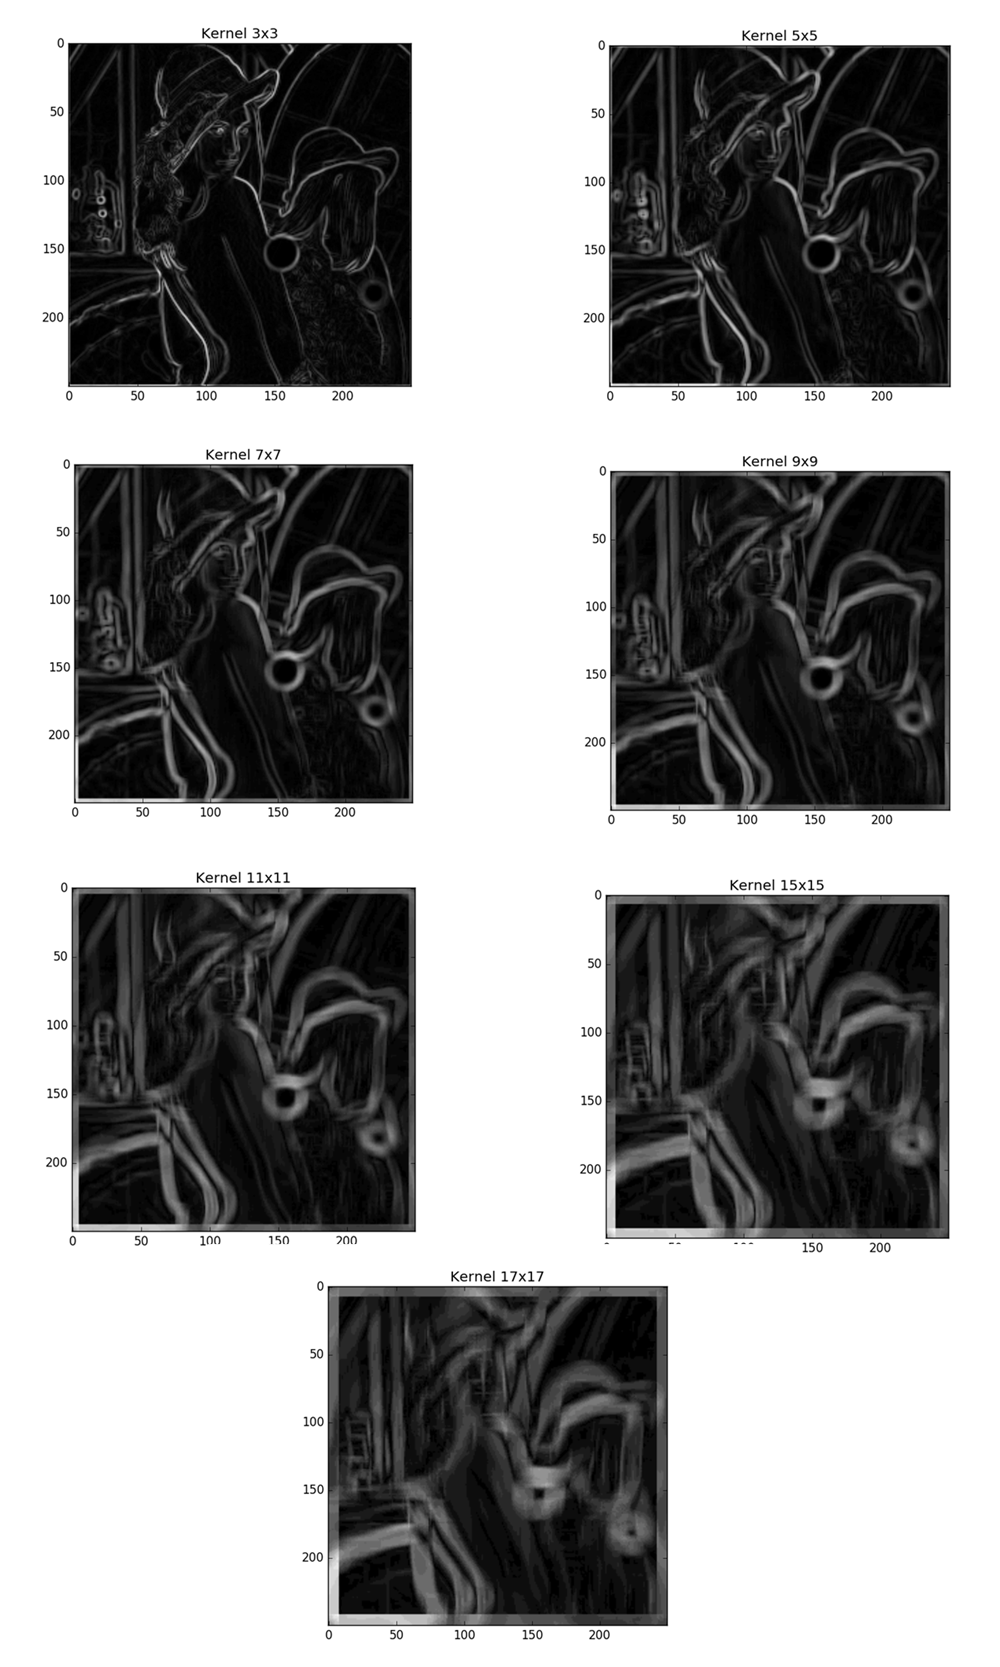

In [11]:
Image(filename='02.png')

## Quanto a aplicações sucessivas do filtro:

Aplicaçãoes excesssivas do filtro também corrompem a imagem original, assim no no Laplace. Por ser um operador de derivada, o cálculo iterativo e prolongado converge para valores fora do domínio da função de imagem, como ilustra-se nas figuras a seguir.

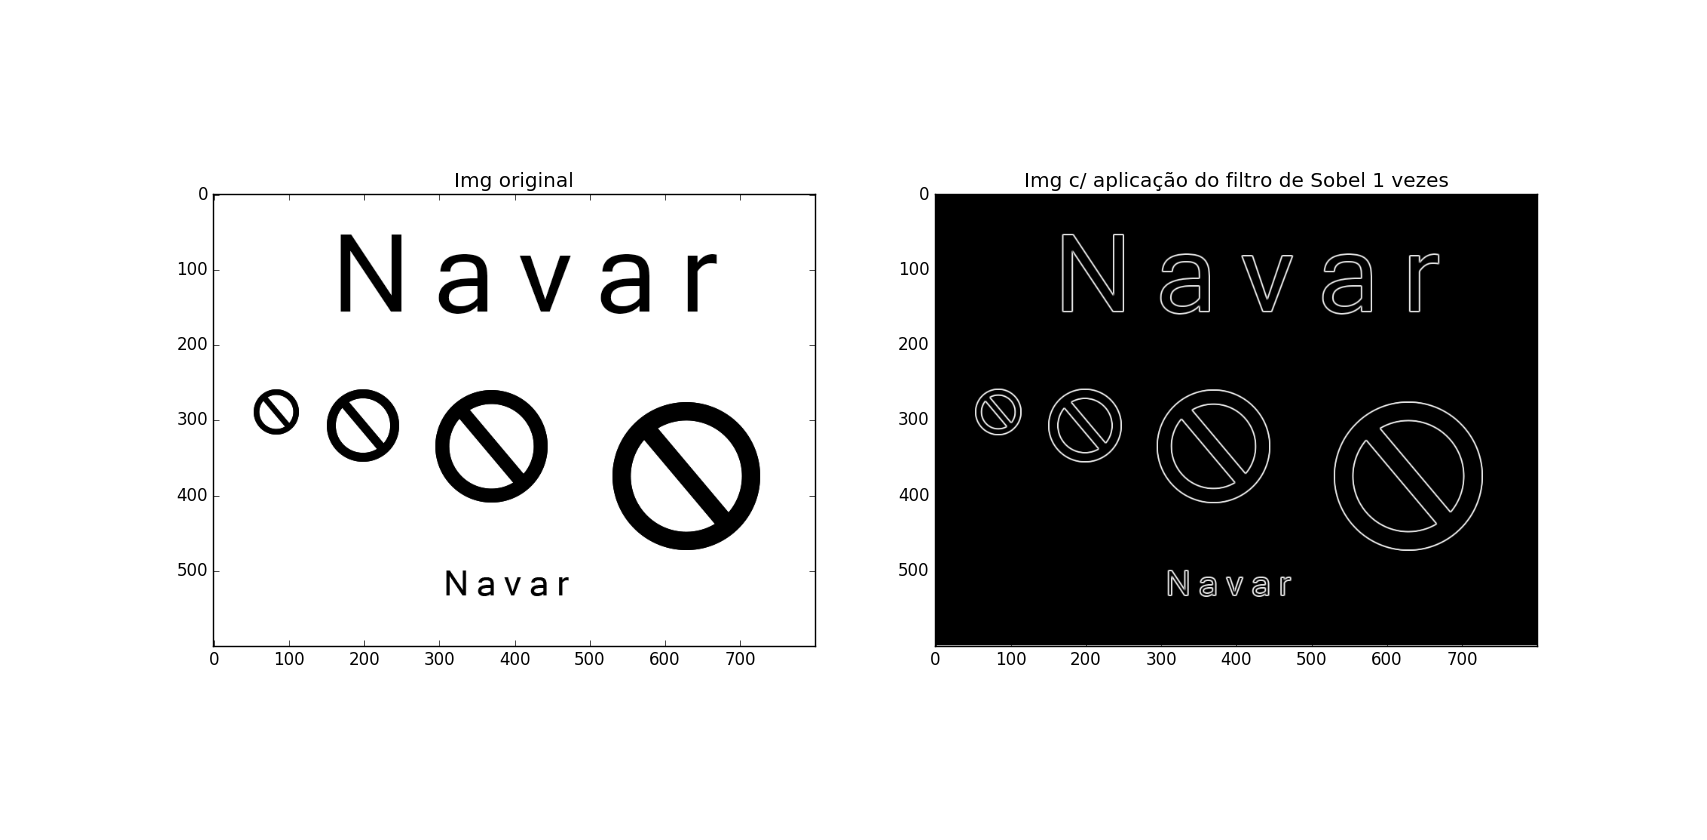

In [12]:
Image(filename='navar-filterSobel-01.png')

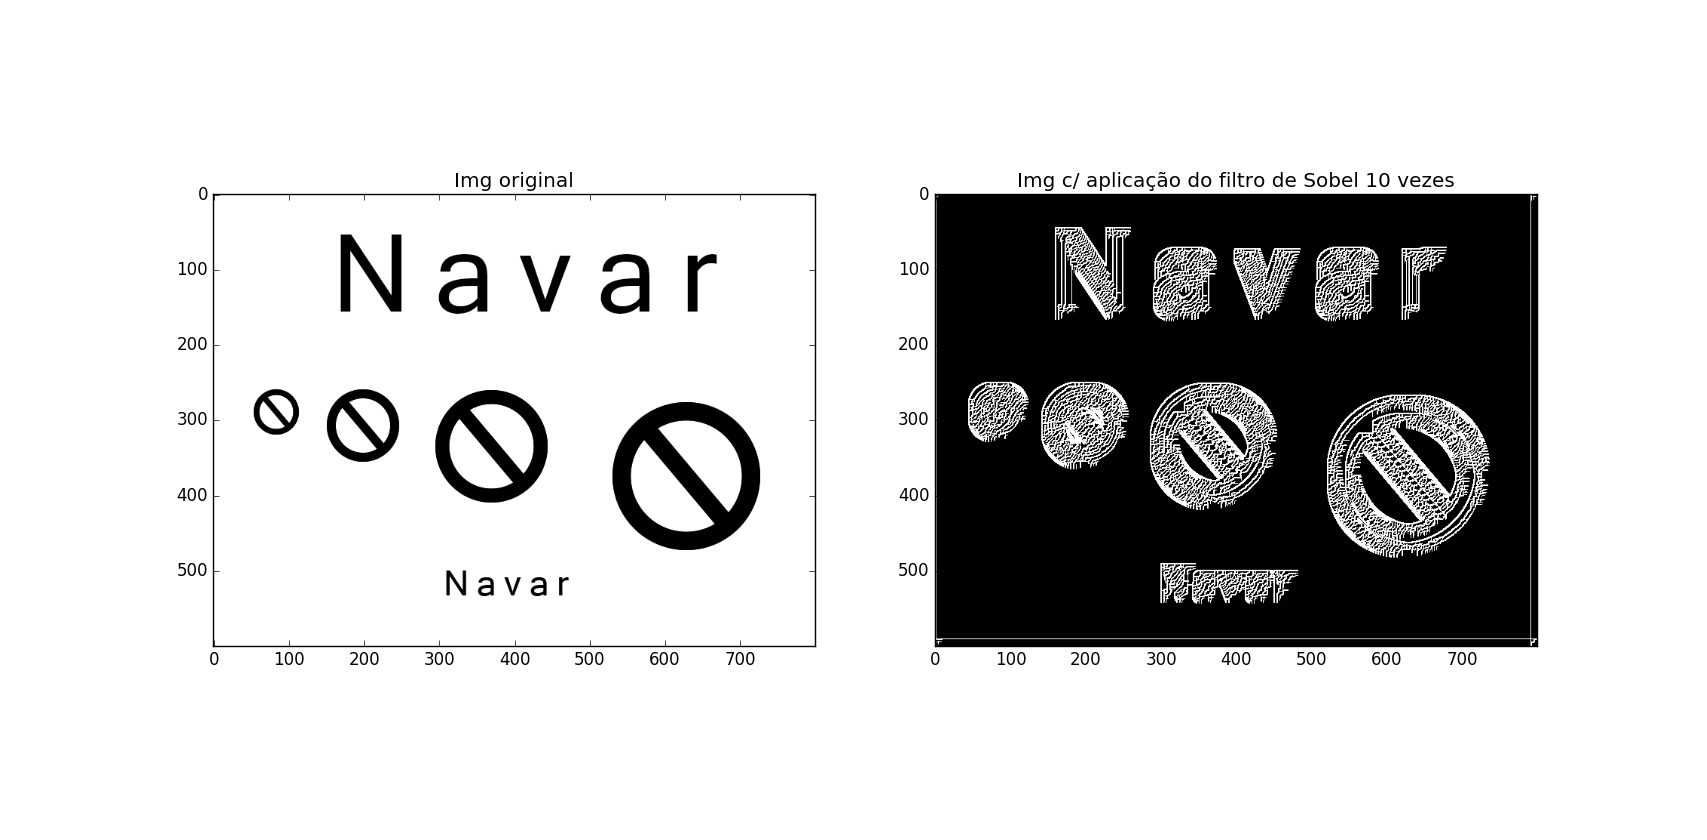

In [13]:
Image(filename='navar-filterSobel-02.png')

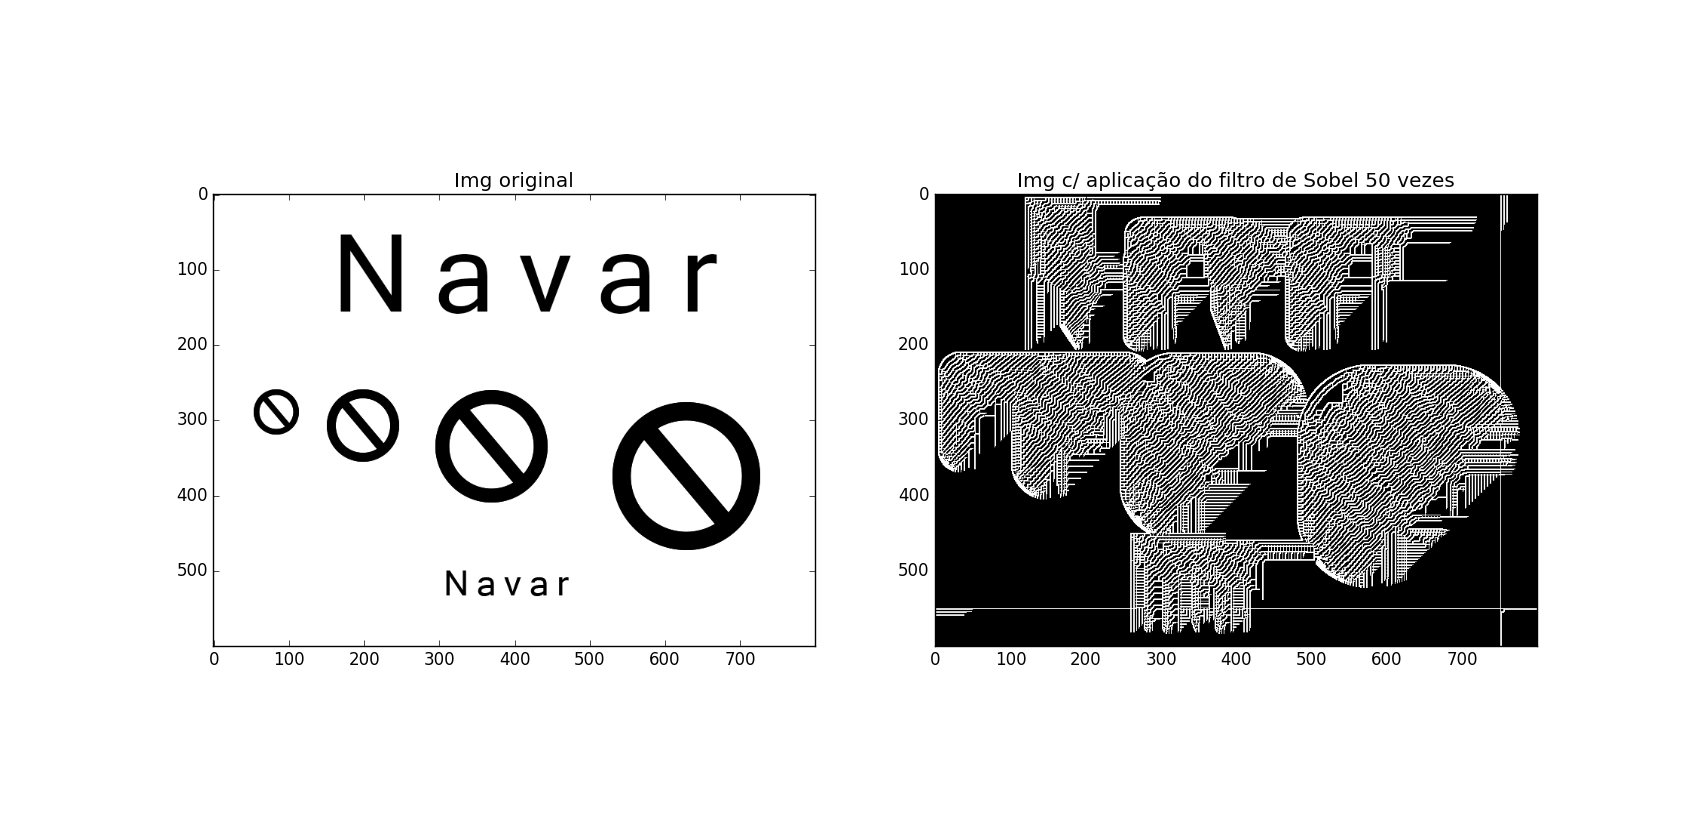

In [14]:
Image(filename='navar-filterSobel-03.png')

## Conclusões

Assim como o filtro de Prewit, o operador de Sobel também ressalta bordas de maneira mais eficaz que Laplace. Porém, assim como Prewit oferece um custo computacional maior para o cálculo das derivadas direcionais(vetores gradientes) em cada direção, sendo necessário a utilização de duas máscaras para tal. A diferente entre Sobrel e Prewit reside na definição de vizinhança: enquanto prewit pondera todos os vizinhos igualmente Sobel oferece uma ponderação maior aos vizinhos adjacentes do que aos os diagonais.

Devido a essa caracaterística o filtro de Sobel é levemente superior ao de Prewit para a caracterização de bordas em regiões finas, principalmente em imagens com objetos pouco distintos entre si.